In [23]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 23 15:23:40 2018

@author: HELM STACK_Overflow Internet
"""
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np


In [24]:

# fix random seed for reproducibility
seed = 12345
np.random.seed(seed)

# load pima indians dataset
#dataset = np.loadtxt("C:\\BÜSRA\\Uni\\Master\\B Fächer\\Data Mining 2\\HELM_2018\\PYTHON_KERAS\\pima-indians-diabetes.csv", delimiter=",")


dataset = pd.read_csv("C:\\BÜSRA\\Uni\\Master\\B Fächer\\Data Mining 2\\HELM_2018\\PYTHON_KERAS\\pima-indians-diabetes.csv", delimiter=",")

dataset.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# split into input (X) and output (Y) variables
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

#print(Y)
#print(Y.shape)
#print(X.shape)
#print(dataset.shape)
#print(dataset)
#print(X)

In [25]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
model = Sequential()

model.add(Dense(12, input_dim=8, kernel_initializer ='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer ='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer ='uniform', activation='sigmoid'))

In [27]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# Fit the model
model.fit(X, Y, epochs=40, batch_size=10)

Epoch 1/40
768/768 [==============================] - 0s 524us/step - loss: 0.6762 - acc: 0.6510
Epoch 2/40
768/768 [==============================] - 0s 118us/step - loss: 0.6622 - acc: 0.6510
Epoch 3/40
768/768 [==============================] - 0s 116us/step - loss: 0.6522 - acc: 0.6523
Epoch 4/40
768/768 [==============================] - 0s 123us/step - loss: 0.6430 - acc: 0.6563
Epoch 5/40
768/768 [==============================] - 0s 112us/step - loss: 0.6265 - acc: 0.6680
Epoch 6/40
768/768 [==============================] - 0s 131us/step - loss: 0.6106 - acc: 0.6628
Epoch 7/40
768/768 [==============================] - 0s 110us/step - loss: 0.6066 - acc: 0.6732
Epoch 8/40
768/768 [==============================] - 0s 120us/step - loss: 0.6002 - acc: 0.6862
Epoch 9/40
768/768 [==============================] - 0s 118us/step - loss: 0.5931 - acc: 0.7018
Epoch 10/40
768/768 [==============================] - 0s 125us/step - loss: 0.5931 - acc: 0.6953
Epoch 11/40
768/768 [========

In [29]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 85us/step
acc: 74.35%


In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

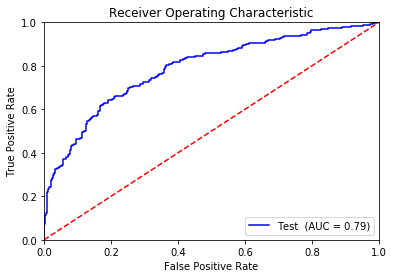

In [31]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X)

fpr, tpr, threshold_test = roc_curve(Y, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC-Kurve + AUC-Wert
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Test  (AUC = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

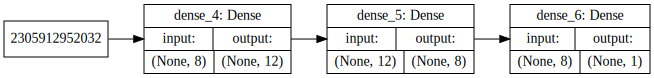

In [32]:
# Print Neural Net Model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, rankdir='LR').create(prog='dot', format='svg'))

In [33]:
# Confusion Matrix
import pandas as pd
Y_preds = model.predict_classes(X)
y_actu = pd.Series(Y, name='Actual')
y_pred = pd.Series(Y_preds[:,0], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print("\n")
print(df_confusion)



Predicted    0    1
Actual             
0          395  105
1           92  176


In [34]:
y_pred1 = model.predict_classes(X)

pd.crosstab(y_pred1[:,0],Y, colnames=['True = reference'], rownames=['Predicted = data'])

True = reference,0,1
Predicted = data,,
0,395,92
1,105,176


In [35]:
dataset.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [50]:
(395+176)/768

0.7434895833333334

In [36]:
# split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=12345)

#print(X_train)
#print(X_test)

In [37]:
model2 = Sequential()

model2.add(Dense(12, input_dim=8, kernel_initializer ='uniform', activation='relu'))
model2.add(Dense(8, kernel_initializer ='uniform', activation='relu'))
model2.add(Dense(1, kernel_initializer ='uniform', activation='sigmoid'))

In [38]:
# Compile model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
# Fit the model
model2.fit(X_train, Y_train, epochs=40, batch_size=10)

Epoch 1/40
460/460 [==============================] - 0s 678us/step - loss: 0.6876 - acc: 0.6435
Epoch 2/40
460/460 [==============================] - 0s 105us/step - loss: 0.6752 - acc: 0.6457
Epoch 3/40
460/460 [==============================] - 0s 113us/step - loss: 0.6694 - acc: 0.6457
Epoch 4/40
460/460 [==============================] - 0s 101us/step - loss: 0.6646 - acc: 0.6457
Epoch 5/40
460/460 [==============================] - 0s 119us/step - loss: 0.6650 - acc: 0.6457
Epoch 6/40
460/460 [==============================] - 0s 132us/step - loss: 0.6578 - acc: 0.6457
Epoch 7/40
460/460 [==============================] - 0s 106us/step - loss: 0.6536 - acc: 0.6500
Epoch 8/40
460/460 [==============================] - 0s 98us/step - loss: 0.6456 - acc: 0.6500
Epoch 9/40
460/460 [==============================] - 0s 102us/step - loss: 0.6411 - acc: 0.6543
Epoch 10/40
460/460 [==============================] - 0s 163us/step - loss: 0.6435 - acc: 0.6457
Epoch 11/40
460/460 [=========

In [40]:
# evaluate the model
scores = model2.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

308/308 [==============================] - 0s 253us/step
acc: 75.00%


In [51]:
y_pred2 = model2.predict_classes(X_test)

pd.crosstab(y_pred2[:,0],Y_test, colnames=['True = reference'], rownames=['Predicted = data'])

True = reference,0,1
Predicted = data,,
0,179,53
1,24,52


In [47]:
Y_test.shape

(308,)

In [48]:
170+36+33+69

308

In [52]:
(179+52)/308

0.75

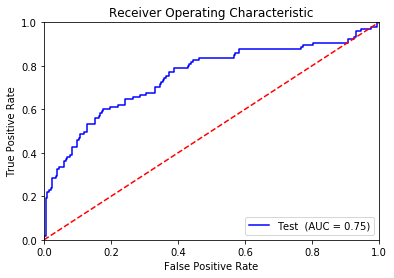

In [53]:
# calculate the fpr and tpr for all thresholds of the classification
probs2 = model2.predict_proba(X_test)

fpr, tpr, threshold_test = roc_curve(Y_test, probs2)
roc_auc = auc(fpr, tpr)

# Plot ROC-Kurve + AUC-Wert
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Test  (AUC = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
model3 = Sequential()

model3.add(Dense(12, input_dim=8, kernel_initializer ='uniform', activation='relu'))
model3.add(Dense(8, kernel_initializer ='uniform', activation='relu'))
model3.add(Dense(8, kernel_initializer ='uniform', activation='relu'))
model3.add(Dense(1, kernel_initializer ='uniform', activation='sigmoid'))

In [55]:
# Compile model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
# Fit the model
model3.fit(X_train, Y_train, epochs=1000, batch_size=40)

Epoch 1/1000
460/460 [==============================] - 0s 43us/step - loss: 0.5044 - acc: 0.7565
Epoch 2/1000
460/460 [==============================] - 0s 31us/step - loss: 0.5032 - acc: 0.7500
Epoch 3/1000
460/460 [==============================] - 0s 28us/step - loss: 0.4974 - acc: 0.7696
Epoch 4/1000
460/460 [==============================] - 0s 33us/step - loss: 0.4985 - acc: 0.7478
Epoch 5/1000
460/460 [==============================] - 0s 51us/step - loss: 0.4973 - acc: 0.7522
Epoch 6/1000
460/460 [==============================] - 0s 37us/step - loss: 0.4968 - acc: 0.7630
Epoch 7/1000
460/460 [==============================] - 0s 30us/step - loss: 0.4986 - acc: 0.7587
Epoch 8/1000
460/460 [==============================] - 0s 31us/step - loss: 0.4918 - acc: 0.7630
Epoch 9/1000
460/460 [==============================] - 0s 43us/step - loss: 0.4948 - acc: 0.7674
Epoch 10/1000
460/460 [==============================] - 0s 38us/step - loss: 0.4923 - acc: 0.7630
Epoch 11/1000
460/4

460/460 [==============================] - 0s 36us/step - loss: 0.4572 - acc: 0.7674
Epoch 84/1000
460/460 [==============================] - 0s 29us/step - loss: 0.4669 - acc: 0.7783
Epoch 85/1000
460/460 [==============================] - 0s 30us/step - loss: 0.4673 - acc: 0.7848
Epoch 86/1000
460/460 [==============================] - 0s 31us/step - loss: 0.4482 - acc: 0.7870
Epoch 87/1000
460/460 [==============================] - 0s 32us/step - loss: 0.4494 - acc: 0.7913
Epoch 88/1000
460/460 [==============================] - 0s 42us/step - loss: 0.4522 - acc: 0.7935
Epoch 89/1000
460/460 [==============================] - 0s 38us/step - loss: 0.4540 - acc: 0.7826
Epoch 90/1000
460/460 [==============================] - 0s 29us/step - loss: 0.4520 - acc: 0.7826
Epoch 91/1000
460/460 [==============================] - 0s 32us/step - loss: 0.4512 - acc: 0.7891
Epoch 92/1000
460/460 [==============================] - 0s 40us/step - loss: 0.4450 - acc: 0.7891
Epoch 93/1000
460/460 [=

460/460 [==============================] - 0s 37us/step - loss: 0.4368 - acc: 0.7826
Epoch 166/1000
460/460 [==============================] - 0s 70us/step - loss: 0.4278 - acc: 0.7957
Epoch 167/1000
460/460 [==============================] - ETA: 0s - loss: 0.3641 - acc: 0.825 - 0s 55us/step - loss: 0.4334 - acc: 0.7913
Epoch 168/1000
460/460 [==============================] - 0s 52us/step - loss: 0.4279 - acc: 0.7848
Epoch 169/1000
460/460 [==============================] - 0s 31us/step - loss: 0.4216 - acc: 0.7891
Epoch 170/1000
460/460 [==============================] - 0s 39us/step - loss: 0.4260 - acc: 0.7913
Epoch 171/1000
460/460 [==============================] - 0s 38us/step - loss: 0.4198 - acc: 0.7913
Epoch 172/1000
460/460 [==============================] - 0s 46us/step - loss: 0.4218 - acc: 0.7978
Epoch 173/1000
460/460 [==============================] - 0s 46us/step - loss: 0.4346 - acc: 0.7957
Epoch 174/1000
460/460 [==============================] - 0s 36us/step - loss

460/460 [==============================] - 0s 36us/step - loss: 0.4111 - acc: 0.8087
Epoch 247/1000
460/460 [==============================] - 0s 42us/step - loss: 0.4128 - acc: 0.8087
Epoch 248/1000
460/460 [==============================] - 0s 39us/step - loss: 0.4125 - acc: 0.8130
Epoch 249/1000
460/460 [==============================] - 0s 38us/step - loss: 0.4182 - acc: 0.7935
Epoch 250/1000
460/460 [==============================] - 0s 44us/step - loss: 0.4068 - acc: 0.8196
Epoch 251/1000
460/460 [==============================] - 0s 50us/step - loss: 0.4166 - acc: 0.8000
Epoch 252/1000
460/460 [==============================] - 0s 41us/step - loss: 0.4119 - acc: 0.8065
Epoch 253/1000
460/460 [==============================] - 0s 58us/step - loss: 0.4295 - acc: 0.7957
Epoch 254/1000
460/460 [==============================] - 0s 51us/step - loss: 0.4187 - acc: 0.8000
Epoch 255/1000
460/460 [==============================] - 0s 41us/step - loss: 0.4079 - acc: 0.8043
Epoch 256/1000


460/460 [==============================] - 0s 35us/step - loss: 0.4244 - acc: 0.7978
Epoch 329/1000
460/460 [==============================] - 0s 39us/step - loss: 0.3968 - acc: 0.8174
Epoch 330/1000
460/460 [==============================] - 0s 45us/step - loss: 0.4098 - acc: 0.8152
Epoch 331/1000
460/460 [==============================] - 0s 38us/step - loss: 0.4057 - acc: 0.8000
Epoch 332/1000
460/460 [==============================] - 0s 39us/step - loss: 0.3974 - acc: 0.8174
Epoch 333/1000
460/460 [==============================] - 0s 47us/step - loss: 0.3964 - acc: 0.8174
Epoch 334/1000
460/460 [==============================] - 0s 42us/step - loss: 0.3916 - acc: 0.8261
Epoch 335/1000
460/460 [==============================] - 0s 53us/step - loss: 0.3961 - acc: 0.8261
Epoch 336/1000
460/460 [==============================] - 0s 46us/step - loss: 0.3928 - acc: 0.8196
Epoch 337/1000
460/460 [==============================] - 0s 42us/step - loss: 0.4057 - acc: 0.8109
Epoch 338/1000


460/460 [==============================] - 0s 45us/step - loss: 0.3884 - acc: 0.8152
Epoch 411/1000
460/460 [==============================] - 0s 51us/step - loss: 0.3943 - acc: 0.8217
Epoch 412/1000
460/460 [==============================] - 0s 45us/step - loss: 0.3873 - acc: 0.8217
Epoch 413/1000
460/460 [==============================] - 0s 47us/step - loss: 0.3860 - acc: 0.8217
Epoch 414/1000
460/460 [==============================] - 0s 37us/step - loss: 0.4047 - acc: 0.8000
Epoch 415/1000
460/460 [==============================] - 0s 37us/step - loss: 0.3981 - acc: 0.8174
Epoch 416/1000
460/460 [==============================] - 0s 40us/step - loss: 0.4014 - acc: 0.8174
Epoch 417/1000
460/460 [==============================] - 0s 47us/step - loss: 0.3962 - acc: 0.8261
Epoch 418/1000
460/460 [==============================] - 0s 51us/step - loss: 0.3852 - acc: 0.8174
Epoch 419/1000
460/460 [==============================] - 0s 52us/step - loss: 0.4020 - acc: 0.8152
Epoch 420/1000


460/460 [==============================] - 0s 39us/step - loss: 0.3929 - acc: 0.8196
Epoch 493/1000
460/460 [==============================] - 0s 43us/step - loss: 0.3897 - acc: 0.8217
Epoch 494/1000
460/460 [==============================] - 0s 43us/step - loss: 0.3872 - acc: 0.8152
Epoch 495/1000
460/460 [==============================] - 0s 38us/step - loss: 0.3887 - acc: 0.8196
Epoch 496/1000
460/460 [==============================] - 0s 32us/step - loss: 0.3857 - acc: 0.8261
Epoch 497/1000
460/460 [==============================] - 0s 36us/step - loss: 0.3793 - acc: 0.8196
Epoch 498/1000
460/460 [==============================] - 0s 36us/step - loss: 0.3892 - acc: 0.8174
Epoch 499/1000
460/460 [==============================] - 0s 45us/step - loss: 0.3723 - acc: 0.8391
Epoch 500/1000
460/460 [==============================] - 0s 43us/step - loss: 0.3777 - acc: 0.8326
Epoch 501/1000
460/460 [==============================] - 0s 44us/step - loss: 0.3805 - acc: 0.8304
Epoch 502/1000


460/460 [==============================] - 0s 60us/step - loss: 0.3713 - acc: 0.8413
Epoch 575/1000
460/460 [==============================] - 0s 46us/step - loss: 0.3753 - acc: 0.8174
Epoch 576/1000
460/460 [==============================] - ETA: 0s - loss: 0.4478 - acc: 0.775 - 0s 54us/step - loss: 0.3734 - acc: 0.8304
Epoch 577/1000
460/460 [==============================] - 0s 45us/step - loss: 0.3899 - acc: 0.8174
Epoch 578/1000
460/460 [==============================] - 0s 47us/step - loss: 0.3722 - acc: 0.8326
Epoch 579/1000
460/460 [==============================] - 0s 46us/step - loss: 0.3689 - acc: 0.8348
Epoch 580/1000
460/460 [==============================] - 0s 45us/step - loss: 0.3696 - acc: 0.8348
Epoch 581/1000
460/460 [==============================] - 0s 57us/step - loss: 0.3694 - acc: 0.8370
Epoch 582/1000
460/460 [==============================] - 0s 40us/step - loss: 0.3689 - acc: 0.8348
Epoch 583/1000
460/460 [==============================] - 0s 44us/step - loss

460/460 [==============================] - 0s 46us/step - loss: 0.3580 - acc: 0.8283
Epoch 656/1000
460/460 [==============================] - 0s 40us/step - loss: 0.3573 - acc: 0.8435
Epoch 657/1000
460/460 [==============================] - 0s 37us/step - loss: 0.3553 - acc: 0.8413
Epoch 658/1000
460/460 [==============================] - 0s 55us/step - loss: 0.3623 - acc: 0.8370
Epoch 659/1000
460/460 [==============================] - 0s 41us/step - loss: 0.3662 - acc: 0.8370
Epoch 660/1000
460/460 [==============================] - 0s 38us/step - loss: 0.3579 - acc: 0.8348
Epoch 661/1000
460/460 [==============================] - 0s 37us/step - loss: 0.3696 - acc: 0.8391
Epoch 662/1000
460/460 [==============================] - 0s 53us/step - loss: 0.3624 - acc: 0.8478
Epoch 663/1000
460/460 [==============================] - 0s 39us/step - loss: 0.3740 - acc: 0.8435
Epoch 664/1000
460/460 [==============================] - 0s 56us/step - loss: 0.3893 - acc: 0.8239
Epoch 665/1000


460/460 [==============================] - 0s 28us/step - loss: 0.3543 - acc: 0.8457
Epoch 738/1000
460/460 [==============================] - 0s 50us/step - loss: 0.3597 - acc: 0.8326
Epoch 739/1000
460/460 [==============================] - 0s 39us/step - loss: 0.3591 - acc: 0.8478
Epoch 740/1000
460/460 [==============================] - 0s 32us/step - loss: 0.3593 - acc: 0.8348
Epoch 741/1000
460/460 [==============================] - 0s 29us/step - loss: 0.3573 - acc: 0.8370
Epoch 742/1000
460/460 [==============================] - 0s 43us/step - loss: 0.3609 - acc: 0.8283
Epoch 743/1000
460/460 [==============================] - 0s 35us/step - loss: 0.3562 - acc: 0.8435
Epoch 744/1000
460/460 [==============================] - 0s 47us/step - loss: 0.3613 - acc: 0.8326
Epoch 745/1000
460/460 [==============================] - 0s 49us/step - loss: 0.3594 - acc: 0.8370
Epoch 746/1000
460/460 [==============================] - 0s 47us/step - loss: 0.3672 - acc: 0.8348
Epoch 747/1000


460/460 [==============================] - 0s 30us/step - loss: 0.3442 - acc: 0.8565
Epoch 819/1000
460/460 [==============================] - 0s 33us/step - loss: 0.3489 - acc: 0.8478
Epoch 820/1000
460/460 [==============================] - 0s 31us/step - loss: 0.3442 - acc: 0.8522
Epoch 821/1000
460/460 [==============================] - 0s 52us/step - loss: 0.3449 - acc: 0.8565
Epoch 822/1000
460/460 [==============================] - 0s 30us/step - loss: 0.3441 - acc: 0.8522
Epoch 823/1000
460/460 [==============================] - 0s 31us/step - loss: 0.3390 - acc: 0.8478
Epoch 824/1000
460/460 [==============================] - 0s 30us/step - loss: 0.3836 - acc: 0.8261
Epoch 825/1000
460/460 [==============================] - 0s 35us/step - loss: 0.3971 - acc: 0.8087
Epoch 826/1000
460/460 [==============================] - 0s 46us/step - loss: 0.3570 - acc: 0.8348
Epoch 827/1000
460/460 [==============================] - 0s 36us/step - loss: 0.3495 - acc: 0.8413
Epoch 828/1000


460/460 [==============================] - 0s 46us/step - loss: 0.3603 - acc: 0.8370
Epoch 901/1000
460/460 [==============================] - 0s 36us/step - loss: 0.3446 - acc: 0.8435
Epoch 902/1000
460/460 [==============================] - 0s 31us/step - loss: 0.3390 - acc: 0.8522
Epoch 903/1000
460/460 [==============================] - 0s 29us/step - loss: 0.3463 - acc: 0.8478
Epoch 904/1000
460/460 [==============================] - 0s 44us/step - loss: 0.3411 - acc: 0.8543
Epoch 905/1000
460/460 [==============================] - 0s 33us/step - loss: 0.3319 - acc: 0.8565
Epoch 906/1000
460/460 [==============================] - 0s 46us/step - loss: 0.3363 - acc: 0.8543
Epoch 907/1000
460/460 [==============================] - 0s 50us/step - loss: 0.3312 - acc: 0.8543
Epoch 908/1000
460/460 [==============================] - 0s 39us/step - loss: 0.3311 - acc: 0.8609
Epoch 909/1000
460/460 [==============================] - 0s 33us/step - loss: 0.3359 - acc: 0.8565
Epoch 910/1000


460/460 [==============================] - 0s 40us/step - loss: 0.3474 - acc: 0.8435
Epoch 983/1000
460/460 [==============================] - 0s 35us/step - loss: 0.3381 - acc: 0.8522
Epoch 984/1000
460/460 [==============================] - 0s 30us/step - loss: 0.3313 - acc: 0.8565
Epoch 985/1000
460/460 [==============================] - 0s 30us/step - loss: 0.3446 - acc: 0.8478
Epoch 986/1000
460/460 [==============================] - 0s 31us/step - loss: 0.3343 - acc: 0.8609
Epoch 987/1000
460/460 [==============================] - 0s 49us/step - loss: 0.3291 - acc: 0.8587
Epoch 988/1000
460/460 [==============================] - 0s 32us/step - loss: 0.3314 - acc: 0.8609
Epoch 989/1000
460/460 [==============================] - 0s 43us/step - loss: 0.3503 - acc: 0.8435
Epoch 990/1000
460/460 [==============================] - 0s 42us/step - loss: 0.3596 - acc: 0.8326
Epoch 991/1000
460/460 [==============================] - 0s 51us/step - loss: 0.3352 - acc: 0.8565
Epoch 992/1000


In [58]:
# evaluate the model
scores = model3.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))

308/308 [==============================] - 0s 274us/step
acc: 74.35%


In [59]:
y_pred3 = model3.predict_classes(X_test)

pd.crosstab(y_pred3[:,0],Y_test, colnames=['True = reference'], rownames=['Predicted = data'])

True = reference,0,1
Predicted = data,,
0,158,34
1,45,71


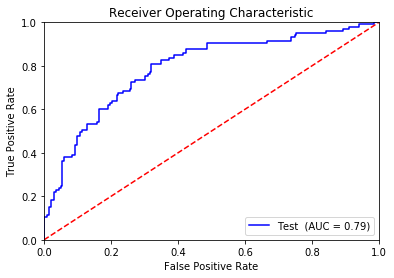

In [60]:
# calculate the fpr and tpr for all thresholds of the classification
probs3 = model3.predict_proba(X_test)

fpr, tpr, threshold_test = roc_curve(Y_test, probs3)
roc_auc = auc(fpr, tpr)

# Plot ROC-Kurve + AUC-Wert
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Test  (AUC = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()